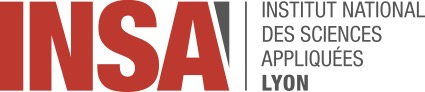
# P2I7: Chapitre 3 méthodes numériques
## Schémas à un pas et consistence
Camille Carvalho (INSA/ICJ)

In [1]:
#libraries to import
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

Pendant cette séance on considère le problème de Cauchy correspondant au pendule non amorti (non linéarisé) :
$$
   \ddot{\theta}(t) = -\frac{g}{\ell}\sin(\theta(t)), ~~~\mbox{ pour } t \ge 0, \quad \theta(0) = \alpha, ~~ \dot{\theta}(0) = 0,
$$
où $\alpha$ est l'angle initial auquel on lâche le pendule à l'instant initial $t=0$ avec une vitesse nulle.


# Exercice 3.6.1
Détaillez la stratégie de point fixe pour le schéma du point milieu et pour le problème du pendule ci-dessus.

**Solution.** On réécrit le problème comme un système du premier ordre
$$ {Y}' = \begin{bmatrix} y' \\ y'' \end{bmatrix} = \begin{bmatrix} y' \\ -\frac{g}{l}\sin(y) \end{bmatrix} = F(Y), \quad {Y}(0) = \begin{bmatrix} \alpha \\ 0 \end{bmatrix}
$$
On pose $\Phi(t, Y_i, Y_{i+1}, \Delta t) = F(t_{i} + \frac{\Delta t}{2}, \frac{Y_{i} + Y_{i+1}}{2})$ et l'on programme alors 
$$ Y_{i+1} = Y_{i} + {\Delta t}\Phi(t, Y_i, Y_{i+1}, \Delta t) , \quad i  = 1, \dots, N-1, \quad \Delta t = \frac{T}{N}, \quad Y_0 = Y(0)$$

La stratégie du point fixe (Newton-Raphson) nous donne le principe suivant:
$$ Y^{j+1}_{i+1} = Y_i + \Delta t \Phi(t, Y_i, Y^j_{i+1}, \Delta t)$$

# Section 3.8: pratique
Implémentez le shéma du point milieu sur le problème du pendule ci-dessus. Vous pourrez dessiner l'évolution de l'énergie totale qui à l'expression $\frac{\dot{\theta}^2(t)}{2} + \frac{g}{\ell}(1-\cos(\theta(t)))$. Si vous avez le temps, comparez également les résultats numériques obtenus avec le schéma du point milieu avec ceux obtenus avec un schéma de Verlet et de RK4.


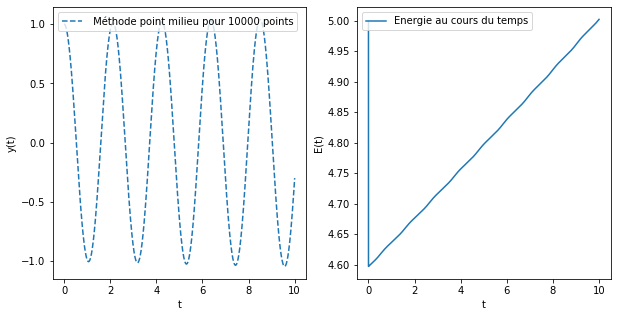

In [12]:
# SOLUTION: 
α = 1
g = 10
l = 1
f1 = lambda t, y, yp: yp
f2 = lambda t, y, yp: -g/l*np.sin(y)
y0 = [α, 0]
a = 0
b = 10
N = 10000

# Fonction calculant la solution discrète et l'énergie discrète
def methode_point_milieu(f1, f2, a, b, α0, N):
    '''
    function that approximate the initial value problem (IVP) y'(t) = f(t,y(t))
    a < t < b, y(a) = α, using midpoint rule, when y is a 2D vector
    
    Parameters
    ==========
    f1: first component function in IVP
    f2: second component function in IVP
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    α0: float number, initial condition of the IVP at t = a
    N: integer, number of subintervals
    
    Returns
    =======
    The sampled time t, as an array of values
    The solution y, as an array of values
    The derivative solution yp, as an array of values
    The energy E, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded
    y = [α0[0]]
    yp = [α0[1]]
    E = [0.5*(g/l)* α0[0]**2]    
    for i in range(1, N+1):
        y_j = y[i-1]
        yp_j = yp[i-1]
        y.append( y[i-1] + Δt * f1(t[i-1] + Δt/2 , (y[i-1] + y_j)/2 , (yp[i-1] + yp_j)/2) )
        yp.append( yp[i-1] + Δt * f2(t[i-1] + Δt/2 , (y[i-1] + y_j)/2 , (yp[i-1] + yp_j)/2) )
        E.append( 1/2* yp[i]**2 + (g/l)* (1- np.cos(y[i]) ) )
    return t, y, yp, E

# comparison approximation and exact solution
t, y, yp, E = methode_point_milieu(f1, f2, a, b, y0, N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(t, y, '--', label = f' Méthode point milieu pour {N} points')
ax1.legend(loc = 'upper left')
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
ax2.plot(t, E, label = 'Energie au cours du temps')
ax2.set_xlabel('t')
ax2.set_ylabel('E(t)')
ax2.legend(loc = 'upper left')